# 📊 Marketing Funnel Analysis with Python

This notebook walks through the complete process of analyzing a digital marketing funnel, identifying drop-off points, calculating conversion rates, and generating actionable insights.

### 1. 📦 Data Simulation

Simulating synthetic data for 5,000 users moving through a 5-step funnel:
- Ad Click
- Landing Page View
- Signup
- Product Trial
- Purchase

Each user is also tagged with a marketing campaign and a channel.

### 2. 📈 Funnel Stage Metrics

Counting users at each funnel stage and computing conversion rates between steps.

### 3. ⏱ Time to Convert Between Stages

Calculating the median number of days users take to progress from one stage to the next.

### 4. 📊 Conversion by Channel

Analyzing conversion rates to purchase for each marketing channel.

### 5. 📢 Conversion by Campaign

Analyzing conversion rates to purchase for each marketing campaign.

### 0. Import needed libraries & Dataset

In [2]:
# import libraries needed for the analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [3]:
# Import the data
df = pd.read_csv(r"C:\Users\Mugen\Desktop\03 - Data Analysis Portfolio Projects\01 - Optimizing the Marketing Funnel - Drop-Off & Conversion Insights\02 - Marketing_Funnel_Dataset.csv")

### 1. Data Overview

In [4]:
df.head()

,user_id,ad_click_date,landing_page_view_date,signup_date,trial_date,purchase_date,campaign,channel
0,user_1,2024-01-07,2024-01-07,2024-01-10,2024-01-11,NaN,Winter Promo,TikTok
1,user_2,2024-01-20,2024-01-20,NaN,NaN,NaN,Spring Launch,YouTube
2,user_3,2024-01-29,NaN,NaN,NaN,NaN,Winter Promo,TikTok
3,user_4,2024-01-15,2024-01-15,2024-01-18,NaN,NaN,Holiday Blitz,YouTube
4,user_5,2024-01-11,2024-01-11,2024-01-14,2024-01-16,2024-01-19,Winter Promo,Instagram


In [5]:
# Check the data types and null values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   user_id                 5000 non-null   object
 1   ad_click_date           5000 non-null   object
 2   landing_page_view_date  4277 non-null   object
 3   signup_date             2605 non-null   object
 4   trial_date              1796 non-null   object
 5   purchase_date           663 non-null    object
 6   campaign                5000 non-null   object
 7   channel                 5000 non-null   object
dtypes: object(8)
memory usage: 312.6+ KB


In [6]:
# Convert the date columns to datetime format

df["ad_click_date"] = pd.to_datetime(df["ad_click_date"], errors="coerce")
df["landing_page_view_date"] = pd.to_datetime(df["landing_page_view_date"], errors="coerce")
df["signup_date"] = pd.to_datetime(df["signup_date"], errors="coerce")
df["trial_date"] = pd.to_datetime(df["trial_date"], errors="coerce")
df["purchase_date"] = pd.to_datetime(df["purchase_date"], errors="coerce")


In [7]:
# Check for duplicates in the dataset
df.duplicated().sum()

0

In [8]:
# Count the number of unique users in the dataset
df["user_id"].nunique()

5000

In [9]:
# Check unique values in the campaign column
df["campaign"].unique()

array(['Winter Promo', 'Spring Launch', 'Holiday Blitz'], dtype=object)

In [10]:
# Check unique values in the Channel column
df["channel"].unique()

array(['TikTok', 'YouTube', 'Instagram', 'Email', 'Google Ads',
       'Facebook'], dtype=object)

In [11]:
# Helper function to add labels on barscharts
def add_bar_labels(ax):
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{int(height)}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', fontsize=9, color='black')

C:\Users\Mugen\AppData\Local\Temp\ipykernel_36044\1868715423.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x="channel", order=channel_order, palette="viridis")


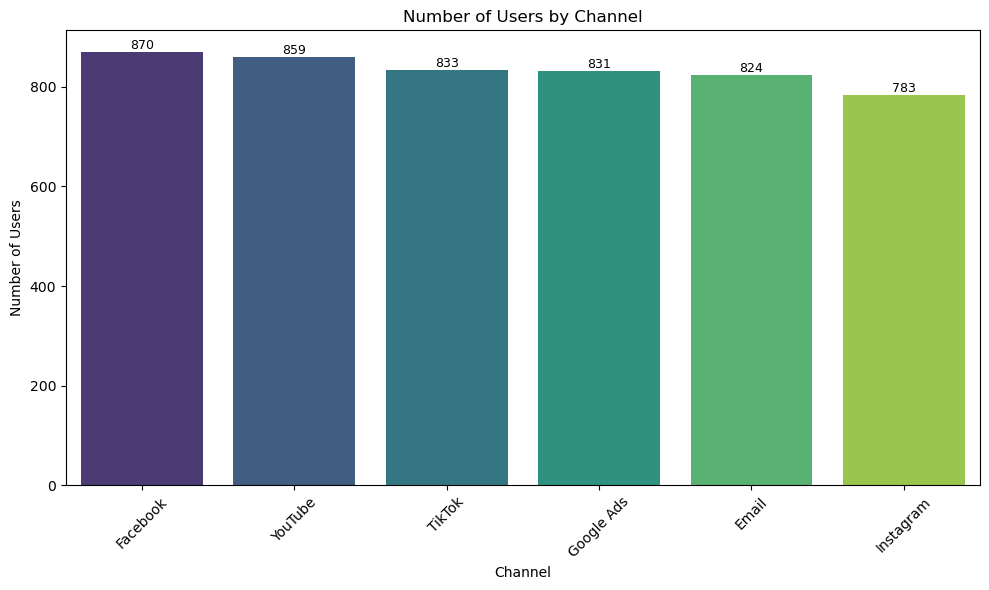

In [12]:
# create a bar chart to count total users ber channel
channel_order = df['channel'].value_counts().index

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x="channel", order=channel_order, palette="viridis")
add_bar_labels(ax)
plt.title("Number of Users by Channel")
plt.xlabel("Channel")
plt.ylabel("Number of Users")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Mugen\AppData\Local\Temp\ipykernel_36044\1944806528.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x="campaign", order=campaign_order, palette="viridis")


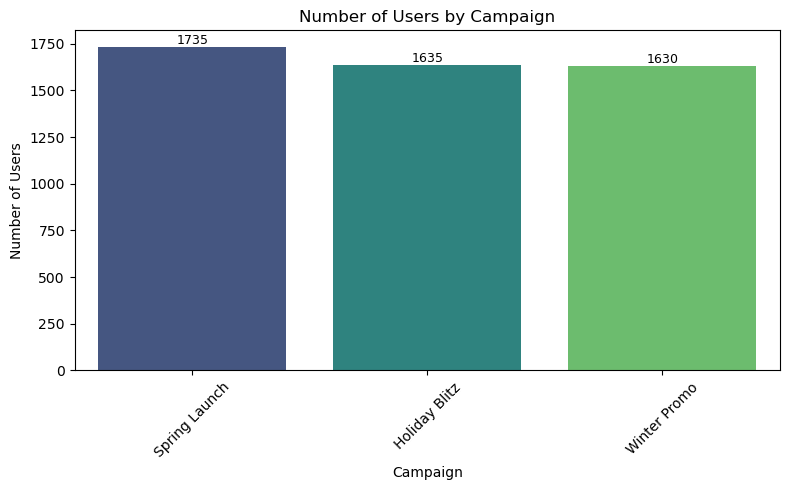

In [13]:
# create a bar chart to count total users per channecampaign
campaign_order = df["campaign"].value_counts().index

plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x="campaign", order=campaign_order, palette="viridis")
add_bar_labels(ax)
plt.title("Number of Users by Campaign")
plt.xlabel("Campaign")
plt.ylabel("Number of Users")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



### 2. Funnel Stage Metrics

Counting users at each funnel stage and computing conversion rates between steps.

In [14]:

# Convert the dictionary to a pandas DataFrame
data_df = pd.DataFrame({
    "number": [
        df["ad_click_date"].notna().sum(),
        df["landing_page_view_date"].notna().sum(),
        df["signup_date"].notna().sum(),
        df["trial_date"].notna().sum(),
        df["purchase_date"].notna().sum()
    ],
    "stage": ["Ad Clicked", "Landing Page Viewed", "Signed Up", "Trial Started", "Purchased"]
})

# Create the funnel plot
fig = px.funnel(data_df, x='number', y='stage', )
fig.show()

In [15]:
funnel_counts = {
    "Ad Clicked": df["ad_click_date"].notna().sum(),
    "Landing Page Viewed": df["landing_page_view_date"].notna().sum(),
    "Signed Up": df["signup_date"].notna().sum(),
    "Trial Started": df["trial_date"].notna().sum(),
    "Purchased": df["purchase_date"].notna().sum()
}

# Create funnel conversion rates
funnel_stages = list(funnel_counts.keys())
funnel_values = list(funnel_counts.values())
conversion_rates = [round((funnel_values[i] / funnel_values[i-1]) * 100, 2) if i > 0 else 100 for i in range(len(funnel_values))]

conversion_rates

[100, 85.54, 60.91, 68.94, 36.92]

### 3. Time to Convert Between Stages

Calculating the median number of days users take to progress from one stage to the next.

In [16]:
# Time to convert between stages (median days)
df_time = df.copy()
df_time["click_to_view"] = (df_time["landing_page_view_date"] - df_time["ad_click_date"]).dt.days
df_time["view_to_signup"] = (df_time["signup_date"] - df_time["landing_page_view_date"]).dt.days
df_time["signup_to_trial"] = (df_time["trial_date"] - df_time["signup_date"]).dt.days
df_time["trial_to_purchase"] = (df_time["purchase_date"] - df_time["trial_date"]).dt.days

median_times = {
    "Click to View": df_time["click_to_view"].median(),
    "View to Signup": df_time["view_to_signup"].median(),
    "Signup to Trial": df_time["signup_to_trial"].median(),
    "Trial to Purchase": df_time["trial_to_purchase"].median()
    }
median_times

{'Click to View': 0.0,
 'View to Signup': 2.0,
 'Signup to Trial': 2.0,
 'Trial to Purchase': 2.0}

### 4. Conversion by Channel

Analyzing conversion rates to purchase for each marketing channel.

In [19]:
# Count Total Conversion of each step by Channel

campaign_conversion_stages = df.groupby("channel").agg(
    Total_Ads_Clicks = ("ad_click_date", "count"),
    Total_Landing_Page_Views = ("landing_page_view_date", "count"),
    Total_SignUps = ("signup_date", "count"),
    Total_Trials = ("trial_date","count"),
    Total_Purchases = ("purchase_date","count")
).reset_index()

campaign_conversion_stages

,channel,Total_Ads_Clicks,Total_Landing_Page_Views,Total_SignUps,Total_Trials,Total_Purchases
0,Email,824,715,425,294,111
1,Facebook,870,759,440,305,116
2,Google Ads,831,717,447,298,104
3,Instagram,783,664,430,298,117
4,TikTok,833,703,419,294,112
5,YouTube,859,719,444,307,103


In [17]:
# Conversion by channel
channel_conversion = df.groupby("channel")["purchase_date"].apply(lambda x: x.notna().mean() * 100).sort_values(ascending=False).round(2)

channel_conversion

channel
Instagram     14.94
Email         13.47
TikTok        13.45
Facebook      13.33
Google Ads    12.52
YouTube       11.99
Name: purchase_date, dtype: float64

### 5. Conversion by Campaign

Analyzing conversion rates to purchase for each marketing campaign.

In [20]:
# Count Total Conversion of each step by campaign

campaign_conversion_stages = df.groupby("campaign").agg(
    Total_Ads_Clicks = ("ad_click_date", "count"),
    Total_Landing_Page_Views = ("landing_page_view_date", "count"),
    Total_SignUps = ("signup_date", "count"),
    Total_Trials = ("trial_date","count"),
    Total_Purchases = ("purchase_date","count")
).reset_index()

campaign_conversion_stages

,campaign,Total_Ads_Clicks,Total_Landing_Page_Views,Total_SignUps,Total_Trials,Total_Purchases
0,Holiday Blitz,1635,1415,869,600,226
1,Spring Launch,1735,1469,873,611,210
2,Winter Promo,1630,1393,863,585,227


In [18]:
# Conversion by campaign
campaign_conversion = df.groupby("campaign")["purchase_date"].apply(lambda x: x.notna().mean() * 100).sort_values(ascending=False).round(2)

campaign_conversion

campaign
Winter Promo     13.93
Holiday Blitz    13.82
Spring Launch    12.10
Name: purchase_date, dtype: float64